In [28]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [43]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
#     model.add(Dense(units=512, activation=activation[1]))
    model.add(Dense(units=128, activation=activation[1]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [3]:
## example with real data on sunspot

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)



In [4]:
#change a single time series into (input, output) data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)


In [46]:
#build RNN
#hidden unit = 3, output = 1, inputshape is T =12 scalar value
model = create_RNN(hidden_units=10, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
187/187 - 1s - loss: 0.0063 - 1s/epoch - 7ms/step
Epoch 2/50
187/187 - 0s - loss: 0.0048 - 452ms/epoch - 2ms/step
Epoch 3/50
187/187 - 0s - loss: 0.0036 - 418ms/epoch - 2ms/step
Epoch 4/50
187/187 - 0s - loss: 0.0041 - 431ms/epoch - 2ms/step
Epoch 5/50
187/187 - 0s - loss: 0.0037 - 424ms/epoch - 2ms/step
Epoch 6/50
187/187 - 1s - loss: 0.0034 - 508ms/epoch - 3ms/step
Epoch 7/50
187/187 - 0s - loss: 0.0038 - 461ms/epoch - 2ms/step
Epoch 8/50
187/187 - 1s - loss: 0.0036 - 515ms/epoch - 3ms/step
Epoch 9/50
187/187 - 0s - loss: 0.0039 - 477ms/epoch - 3ms/step
Epoch 10/50
187/187 - 1s - loss: 0.0038 - 525ms/epoch - 3ms/step
Epoch 11/50
187/187 - 1s - loss: 0.0036 - 525ms/epoch - 3ms/step
Epoch 12/50
187/187 - 1s - loss: 0.0041 - 520ms/epoch - 3ms/step
Epoch 13/50
187/187 - 1s - loss: 0.0033 - 512ms/epoch - 3ms/step
Epoch 14/50
187/187 - 0s - loss: 0.0033 - 485ms/epoch - 3ms/step
Epoch 15/50
187/187 - 1s - loss: 0.0037 - 533ms/epoch - 3ms/step
Epoch 16/50
187/187 - 1s - loss: 0.00

In [47]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.054 RMSE
Test RMSE: 0.073 RMSE


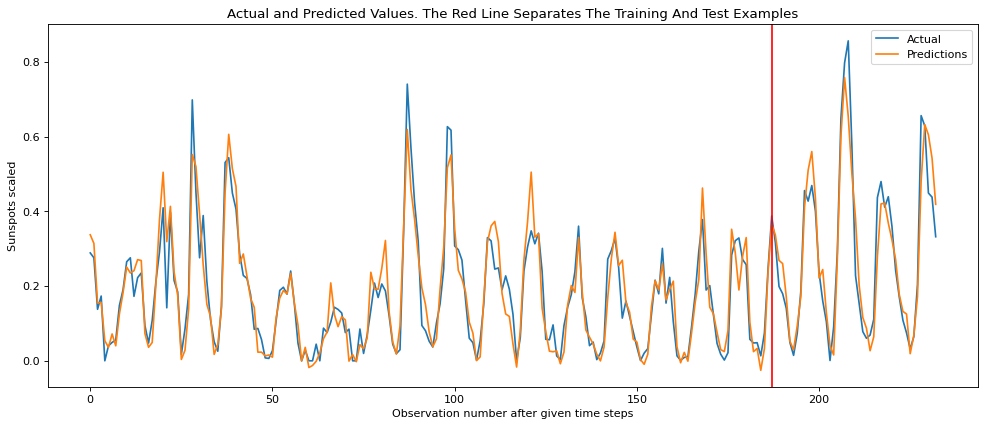

In [48]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

In [49]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 10)                120       
                                                                 
 dense_25 (Dense)            (None, 128)               1408      
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________
